# Intro

On veut montrer que la méthode classique est biaisée

In [2]:
import numpy as np

from noise3d import genseq
from noise3d import noise
from noise3d import bias

In [3]:

H = V = 100

# On va mesurer le bruit tvh sur différentes tailles de stack
t_min = 10
t_max = 300
delta_t = 5
ech_t = np.arange(t_min, t_max, delta_t)

# Et on répète l'opération pour plusieurs stack
nb_matrix = 100
 
# On prépare le stockage des résultats
res_var_tot = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_t = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_v = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_h = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_tv = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_th = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_vh = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_tvh = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
 

In [4]:
# On génère une séquence avec uniquement du bruit tvh
var_tvh = 1


# On fait les mesures
for k in range(1, nb_matrix+1):

    i = k-1
    data_total = genseq.genseq_tvh(t_max, V, H, 0, var_tvh)
   
    j = 0
    for t in ech_t:
        data = data_total[0:t]
        (vt, vv, vh, vtv, vth, vvh, vtvh), vtot  = noise.get_all_3d_noise_var_fast(data)
        res_var_t[i, j] = vt
        res_var_v[i, j] = vv
        res_var_h[i, j] = vh
        res_var_tv[i, j] = vtv
        res_var_th[i, j] = vth
        res_var_vh[i, j] = vvh
        res_var_tvh[i, j] = vtvh
        res_var_tot[i, j] = vtot
 
        j = j+1

# On moyenne les résultats
mean_var_tot = np.mean(res_var_tot, axis=0, dtype=np.float64)
mean_var_t = np.mean(res_var_t, axis=0, dtype=np.float64)
mean_var_v = np.mean(res_var_v, axis=0, dtype=np.float64)
mean_var_h = np.mean(res_var_h, axis=0, dtype=np.float64)
mean_var_tv = np.mean(res_var_tv, axis=0, dtype=np.float64)
mean_var_th = np.mean(res_var_th, axis=0, dtype=np.float64)
mean_var_vh = np.mean(res_var_vh, axis=0, dtype=np.float64)
mean_var_tvh = np.mean(res_var_tvh, axis=0, dtype=np.float64)

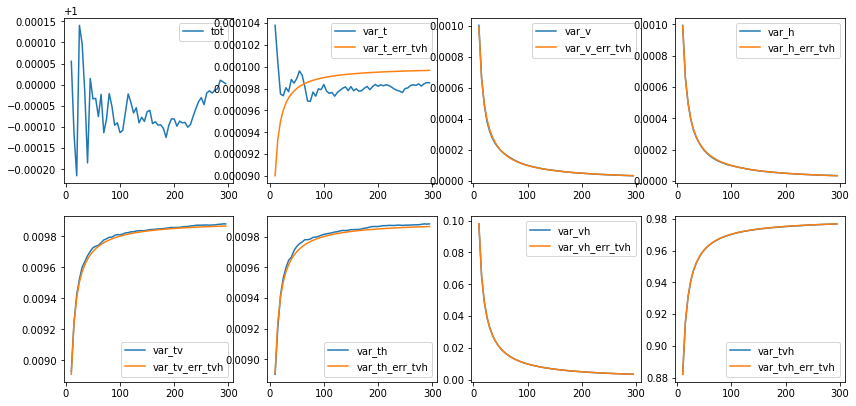

In [6]:
import matplotlib.pyplot as plt
 
figure = plt.figure(figsize=(14,14))
 
plt.subplot(4, 4, 1)
plt.plot(ech_t, mean_var_tot, label="tot")
plt.legend()
plt.subplot(4, 4, 2)
plt.plot(ech_t, mean_var_t, label="var_t")
plt.plot(ech_t, bias.var_t_err_tvh(ech_t, V, H, var_tvh**2), label="var_t_err_tvh")
plt.legend()
plt.subplot(4, 4, 3)
plt.plot(ech_t, mean_var_v, label="var_v")
plt.plot(ech_t, bias.var_v_err_tvh(ech_t, V, H, var_tvh**2), label="var_v_err_tvh")
plt.legend()
plt.subplot(4, 4, 4)
plt.plot(ech_t, mean_var_h, label="var_h")
plt.plot(ech_t, bias.var_h_err_tvh(ech_t, V, H, var_tvh**2), label="var_h_err_tvh")
plt.legend()
plt.subplot(4, 4, 5)
plt.plot(ech_t, mean_var_tv, label="var_tv")
plt.plot(ech_t, bias.var_tv_err_tvh(ech_t, V, H, var_tvh**2), label="var_tv_err_tvh")
plt.legend()
plt.subplot(4, 4, 6)
plt.plot(ech_t, mean_var_th, label="var_th")
plt.plot(ech_t, bias.var_th_err_tvh(ech_t, V, H, var_tvh**2), label="var_th_err_tvh")
plt.legend()
plt.subplot(4, 4, 7)
plt.plot(ech_t, mean_var_vh, label="var_vh")
plt.plot(ech_t, bias.var_vh_err_tvh(ech_t, V, H, var_tvh**2), label="var_vh_err_tvh")
plt.legend()
plt.subplot(4, 4, 8)
plt.plot(ech_t, mean_var_tvh, label="var_tvh")
plt.plot(ech_t, bias.var_tvh_err_tvh(ech_t, V, H, var_tvh**2), label="var_tvh_err_tvh")
plt.legend()

In [26]:
import noise3d

var_vh = 1
var_tvh = 1


res_var_bsf = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)
res_var_netd = np.zeros((nb_matrix, len(ech_t)), dtype=np.float64)


for k in range(1, nb_matrix+1):

    i = k-1
    data_total = genseq.genseq_3dnoise_seq(t_max, V, H, (0, 0, 0, 0, 0, var_vh, var_tvh))
   
    j = 0
    for t in ech_t:
        data = data_total[0:t]
        (vt, vv, vh, vtv, vth, vvh, vtvh), vtot  = noise.get_all_3d_corrected_var_matrix(data)
        res_var_t[i, j] = vt
        res_var_v[i, j] = vv
        res_var_h[i, j] = vh
        res_var_tv[i, j] = vtv
        res_var_th[i, j] = vth
        res_var_vh[i, j] = vvh
        res_var_bsf[i, j] = noise3d.noise.var_fpn(data)
        res_var_tvh[i, j] = vtvh
        res_var_netd[i, j] = noise3d.noise.var_netd(data)
        res_var_tot[i, j] = vtot
 
        j = j+1

mean_var_tot = np.mean(res_var_tot, axis=0, dtype=np.float64)
mean_var_t = np.mean(res_var_t, axis=0, dtype=np.float64)
mean_var_v = np.mean(res_var_v, axis=0, dtype=np.float64)
mean_var_h = np.mean(res_var_h, axis=0, dtype=np.float64)
mean_var_tv = np.mean(res_var_tv, axis=0, dtype=np.float64)
mean_var_th = np.mean(res_var_th, axis=0, dtype=np.float64)
mean_var_vh = np.mean(res_var_vh, axis=0, dtype=np.float64)
mean_var_bsf = np.mean(res_var_bsf, axis=0, dtype=np.float64)
mean_var_tvh = np.mean(res_var_tvh, axis=0, dtype=np.float64)
mean_var_netd = np.mean(res_var_netd, axis=0, dtype=np.float64)


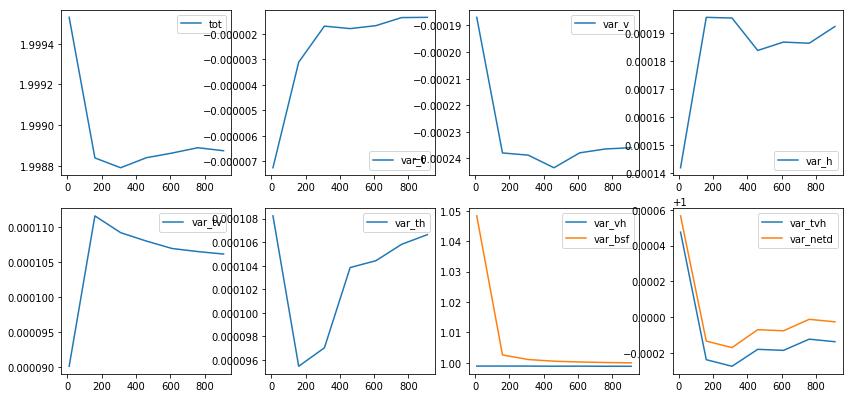

In [27]:
import matplotlib.pyplot as plt
 
figure = plt.figure(figsize=(14,14))
 
plt.subplot(4, 4, 1)
plt.plot(ech_t, mean_var_tot, label="tot")
plt.legend()
plt.subplot(4, 4, 2)
plt.plot(ech_t, mean_var_t, label="var_t")
plt.legend()
plt.subplot(4, 4, 3)
plt.plot(ech_t, mean_var_v, label="var_v")
plt.legend()
plt.subplot(4, 4, 4)
plt.plot(ech_t, mean_var_h, label="var_h")
plt.legend()
plt.subplot(4, 4, 5)
plt.plot(ech_t, mean_var_tv, label="var_tv")
plt.legend()
plt.subplot(4, 4, 6)
plt.plot(ech_t, mean_var_th, label="var_th")
plt.legend()
plt.subplot(4, 4, 7)
plt.plot(ech_t, mean_var_vh, label="var_vh")
plt.plot(ech_t, mean_var_bsf, label="var_bsf")
plt.legend()
plt.subplot(4, 4, 8)
plt.plot(ech_t, mean_var_tvh, label="var_tvh")
plt.plot(ech_t, mean_var_netd, label="var_netd")
plt.legend()